In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random



In [4]:
# Set the working directory to the folder containing your datasets
path = r'C:\Users\Admin\OneDrive\Desktop\new dataset'
os.chdir(path)

# Define the file paths
games_path = 'games.csv'
recommendations_path = 'recommendations.csv'
output_path = 'merged_games_recommendations.csv'



In [5]:
recommendations = pd.read_csv(recommendations_path)

In [6]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [7]:
#count of reviews for each app_id
review_counts = recommendations['app_id'].value_counts().reset_index()
review_counts.columns = ['app_id', 'review_count']

# Filter app_ids whose counts are greater than the counts of reviews
filtered_app_ids = review_counts[review_counts['review_count'] > review_counts['review_count'].mean()]

# Results
filtered_app_ids

,app_id,review_count
0,440,319492
1,252490,270684
2,1091500,226414
3,730,219737
4,570,216914
...,...,...
3484,230820,1096
3485,300570,1096
3486,302080,1096
3487,1020470,1095


In [8]:
games = pd.read_csv(games_path)

In [9]:
# Merge two Datasets games and recommendations
merged_df = pd.merge(recommendations[recommendations['app_id'].isin(filtered_app_ids['app_id'])], games, on='app_id', how='inner')

In [10]:
merged_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,975370,0,0,2022-12-12,True,36.3,51580,0,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,19665,30.00,0.00,0.0,True
1,304390,4,0,2017-02-17,False,11.5,2586,1,FOR HONOR™,2017-02-13,True,False,False,Mixed,69,82277,15.00,0.00,0.0,True
2,1085660,2,0,2019-11-17,True,336.5,253880,2,Destiny 2,2019-10-01,True,False,False,Very Positive,81,562723,0.00,0.00,0.0,True
3,703080,0,0,2022-09-23,True,27.4,259432,3,Planet Zoo,2019-11-05,True,False,False,Very Positive,90,60113,45.00,0.00,0.0,True
4,526870,0,0,2021-01-10,True,7.9,23869,4,Satisfactory,2020-06-08,True,False,False,Overwhelmingly Positive,97,119866,30.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37414240,633230,0,0,2021-02-15,True,41.0,1606890,41154789,NARUTO TO BORUTO: SHINOBI STRIKER,2023-06-29,True,False,False,Very Positive,85,40328,20.00,0.00,0.0,True
37414241,758870,8,0,2019-07-18,False,8.0,1786254,41154790,Kynseed,2022-12-06,True,False,False,Very Positive,80,2125,24.99,24.99,0.0,True
37414242,696170,3,10,2018-03-26,False,2.0,6370324,41154791,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True
37414243,696170,0,0,2018-06-11,True,4.0,1044289,41154792,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True


In [11]:
merged_df['date_release'] = pd.to_datetime(merged_df['date_release'])
merged_df['date_release'].dt.year.value_counts()

date_release
2020    4074679
2018    3866379
2017    3846296
2016    3669994
2019    3229048
2021    3189416
2015    3180128
2022    2612522
2013    2354761
2014    1931324
2012    1640567
2011     797695
2009     675511
2010     624555
2007     615414
2023     425722
2008     245319
2006     169308
2004     111276
1998      62451
2000      45269
1999      14005
2001       9090
2005       8284
2002       6832
2003       4432
1997       3968
Name: count, dtype: int64

In [12]:
# Convert 'release_date' column to datetime format
merged_df['date_release'] = pd.to_datetime(merged_df['date_release'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter the DataFrame to keep only records between 2017 and 2021
filtered_df = merged_df[(merged_df['date_release'].dt.year >= 2017) & (merged_df['date_release'].dt.year <= 2021) & (merged_df['date_release'].dt.date <= merged_df['date'].dt.date)]

In [13]:
filtered_df['date_release'].dt.year.value_counts()

date_release
2020    3677755
2017    3547052
2018    3477575
2019    2975898
2021    2880699
Name: count, dtype: int64

In [ ]:
Final = filtered_df.to_csv('Final_data.csv' , index=False)

In [1]:
import pandas as pd

Final = pd.read_csv('Final_data.csv')


In [2]:
Final

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,304390,4,0,2017-02-17,False,11.5,2586,1,FOR HONOR™,2017-02-13,True,False,False,Mixed,69,82277,15.00,0.00,0.0,True
1,1085660,2,0,2019-11-17,True,336.5,253880,2,Destiny 2,2019-10-01,True,False,False,Very Positive,81,562723,0.00,0.00,0.0,True
2,703080,0,0,2022-09-23,True,27.4,259432,3,Planet Zoo,2019-11-05,True,False,False,Very Positive,90,60113,45.00,0.00,0.0,True
3,526870,0,0,2021-01-10,True,7.9,23869,4,Satisfactory,2020-06-08,True,False,False,Overwhelmingly Positive,97,119866,30.00,0.00,0.0,True
4,306130,0,0,2021-10-10,True,8.6,45425,5,The Elder Scrolls® Online,2017-05-22,True,True,False,Very Positive,83,114079,20.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558974,626690,0,0,2018-11-26,True,28.0,13236596,41154779,Sword Art Online: Fatal Bullet,2018-02-23,True,False,False,Very Positive,80,14234,39.99,39.99,0.0,True
16558975,674940,0,0,2022-02-26,True,8.0,3216841,41154780,Stick Fight: The Game,2017-09-28,True,True,False,Very Positive,93,89774,5.00,0.00,0.0,True
16558976,696170,3,10,2018-03-26,False,2.0,6370324,41154791,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True
16558977,696170,0,0,2018-06-11,True,4.0,1044289,41154792,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True


In [14]:
#DATACLEANING

# Price threshold
price_threshold = 1000  # Set this to the desired threshold

# Cast price_final & price_original to float.
Final['price_final'] = Final['price_final'].astype(float)
Final['price_original'] = Final['price_original'].astype(float)

# Keep only games for which price_final is zero
Final['is_free'] = Final['price_final'] == 0

# Remove games with high prices (Above $1000)
Final = Final[(Final['price_final'] >= 0) & (Final['price_final'] <= price_threshold)]
Final = Final[(Final['price_original'] >= 0) & (Final['price_original'] <= price_threshold)]

# Filter by entries that did not buy below the original price
Final = Final[Final['price_final'] <= Final['price_original']]

# Calculate the discount percentage
Final['discount'] = ((Final['price_original'] - Final['price_final']) / Final['price_original']) * 100

# Clip the discount range to be between 0% and 100%
Final['discount'] = Final['discount'].clip(lower=0, upper=100)

# Save the cleaned data to a CSV
Final.to_csv('cleaned_final.csv', index=False)

print("Data cleaning and modification completed and saved to 'cleaned_final.csv'.")



Data cleaning and modification completed and saved to 'cleaned_final.csv'.


In [15]:
# Defining the new column names
new_column_names = {
    'app_id': 'AppID',
    'helpful': 'HelpfulCount',
    'funny': 'FunnyCount',
    'date': 'ReviewDate',
    'is_recommended': 'IsRecommended',
    'hours': 'HoursPlayed',
    'user_id': 'UserID',
    'review_id': 'ReviewID',
    'title': 'GameTitle',
    'date_release': 'ReleaseDate',
    'win': 'WindowsSupport',
    'mac': 'MacSupport',
    'linux': 'LinuxSupport',
    'rating': 'Rating',
    'positive_ratio': 'PositiveRatio',
    'user_reviews': 'UserReviewCount',
    'price_final': 'FinalPrice',
    'price_original': 'OriginalPrice',
    'discount': 'DiscountPercentage',
    'steam_deck': 'SteamDeckSupport'
}

# Rename the columns
Final.rename(columns=new_column_names, inplace=True)

# Save the cleaned and renamed dataset
Final.to_csv('cleaned_final_with_renamed_columns.csv', index=False)

print("Data cleaning and renaming completed and saved to 'cleaned_final_with_renamed_columns.csv'.")


Data cleaning and renaming completed and saved to 'cleaned_final_with_renamed_columns.csv'.


In [16]:
# Save the cleaned dataset
Final.to_csv('cleaned_final.csv', index=False)

In [17]:
Final.head()

,AppID,HelpfulCount,FunnyCount,ReviewDate,IsRecommended,HoursPlayed,UserID,ReviewID,GameTitle,ReleaseDate,...,MacSupport,LinuxSupport,Rating,PositiveRatio,UserReviewCount,FinalPrice,OriginalPrice,DiscountPercentage,SteamDeckSupport,is_free
1,1085660,2,0,2019-11-17,True,336.5,253880,2,Destiny 2,2019-10-01,...,False,False,Very Positive,81,562723,0.0,0.0,NaN,True,True
6,1286830,2,0,2020-07-26,True,19.3,113279,13,STAR WARS™: The Old Republic™,2020-07-21,...,False,False,Very Positive,89,54766,0.0,0.0,NaN,True,True
13,1172470,2,0,2021-05-04,True,235.1,375629,25,Apex Legends™,2020-11-04,...,False,False,Very Positive,80,713182,0.0,0.0,NaN,True,True
16,291550,0,0,2021-05-17,False,2.7,641971,29,Brawlhalla,2017-10-17,...,True,False,Very Positive,83,335623,0.0,0.0,NaN,True,True
18,438100,0,0,2020-09-10,True,8.1,912612,32,VRChat,2017-02-01,...,False,False,Mostly Positive,73,202265,0.0,0.0,NaN,True,True


In [18]:
#STATISTICS

# Transform columns to right types and format
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'])

#Selecting the Number Columns for the Statistical Inequal Distribution
numeric_cols = Final.select_dtypes(include=['number']).columns

# Basic statistics for key numerical columns Calculate
statistics = Final[numeric_cols].describe().T

# Additional statistics
statistics['median'] = Final[numeric_cols].median()
statistics['std_dev'] = Final[numeric_cols].std()
statistics['var'] = Final[numeric_cols].var()
statistics['range'] = Final[numeric_cols].max() - Final[numeric_cols].min()
statistics['q1'] = Final[numeric_cols].quantile(0.25)
statistics['q3'] = Final[numeric_cols].quantile(0.75)
statistics['iqr'] = statistics['q3'] - statistics['q1']

# Display the statistics
print(statistics[['mean', 'median', 'std_dev', 'min', '25%', '50%', '75%', 'max', 'range', 'q1', 'q3', 'iqr']])


                            mean       median       std_dev     min  \
AppID               8.631740e+05    797430.00  3.752345e+05  7800.0   
HelpfulCount        3.014641e+00         0.00  3.892211e+01     0.0   
FunnyCount          9.530659e-01         0.00  1.883061e+01     0.0   
HoursPlayed         7.965290e+01        18.50  1.590105e+02     0.0   
UserID              7.415033e+06   7673153.00  4.099086e+06     0.0   
ReviewID            2.332435e+07  24554660.00  1.118599e+07     2.0   
PositiveRatio       8.434785e+01        87.00  1.123508e+01    15.0   
UserReviewCount     8.655163e+04     17796.00  2.328241e+05    96.0   
FinalPrice          1.315129e+01         7.99  1.544212e+01     0.0   
OriginalPrice       1.438082e+01         9.99  1.608048e+01     0.0   
DiscountPercentage  7.706485e+00         0.00  2.157386e+01     0.0   

                           25%          50%          75%           max  \
AppID                 567640.0    797430.00   1147560.00  1.830840e+06   

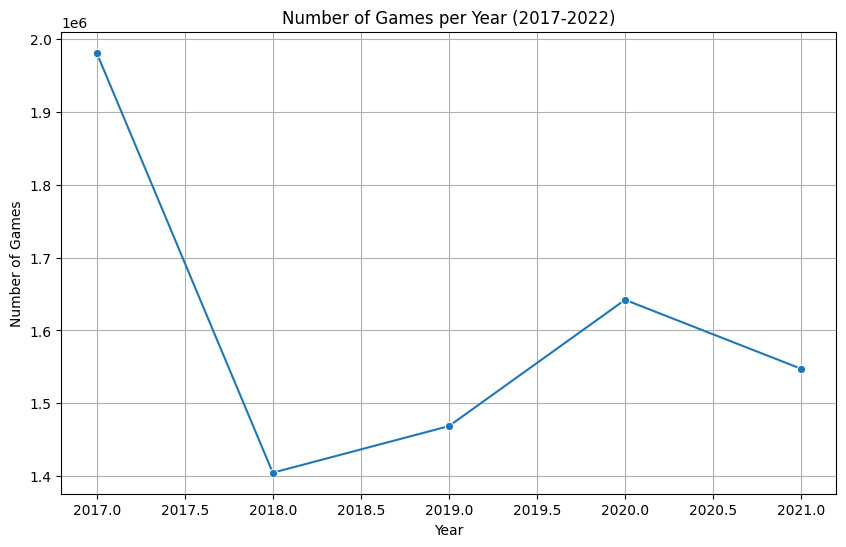

In [19]:
#Exploratory data analysis 1

Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])

# Extract the year from the date
Final['year'] = Final['ReleaseDate'].dt.year

# Grouping games by a year and count the number of games.
games_per_year = Final.groupby('year').size().reset_index(name='count')

# Plotting the time series 
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=games_per_year, marker='o')
plt.title('Number of Games per Year (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

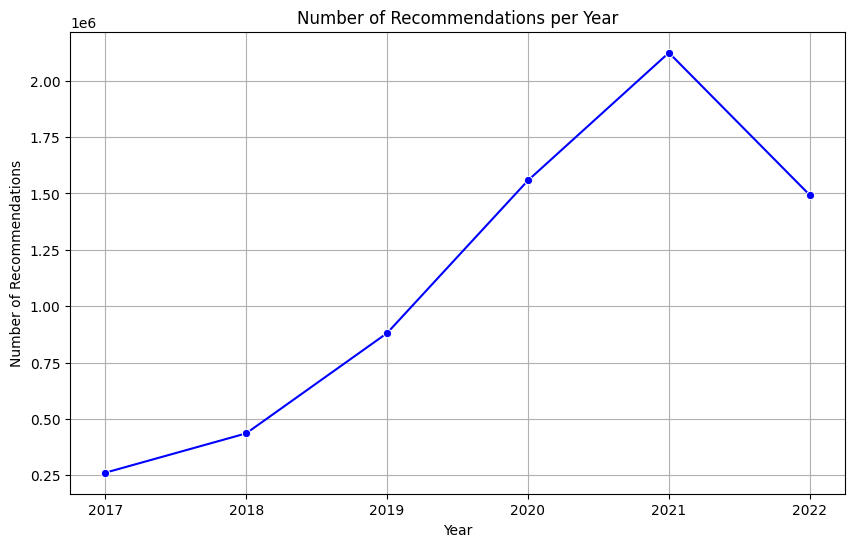

In [20]:
#Exploartory data analysis 2

# Convert date to datetime format
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])

# Pull out the year from this date
Final['year'] = Final['ReviewDate'].dt.year

# Filter for recommendations
recommended_df = Final[Final['IsRecommended'] == True]

# Create a DataFrame for the line plot
lineplot_data = recommended_df.groupby('year').size().reset_index(name='recommendations')

# Display DataFrame for the line plot.
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='recommendations', data=lineplot_data, marker='o', color='b')
plt.title('Number of Recommendations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Recommendations')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1229147028.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games = top_games.groupby('Rating').apply(lambda x: x.nlargest(5, 'review_count')).reset_index(drop=True)


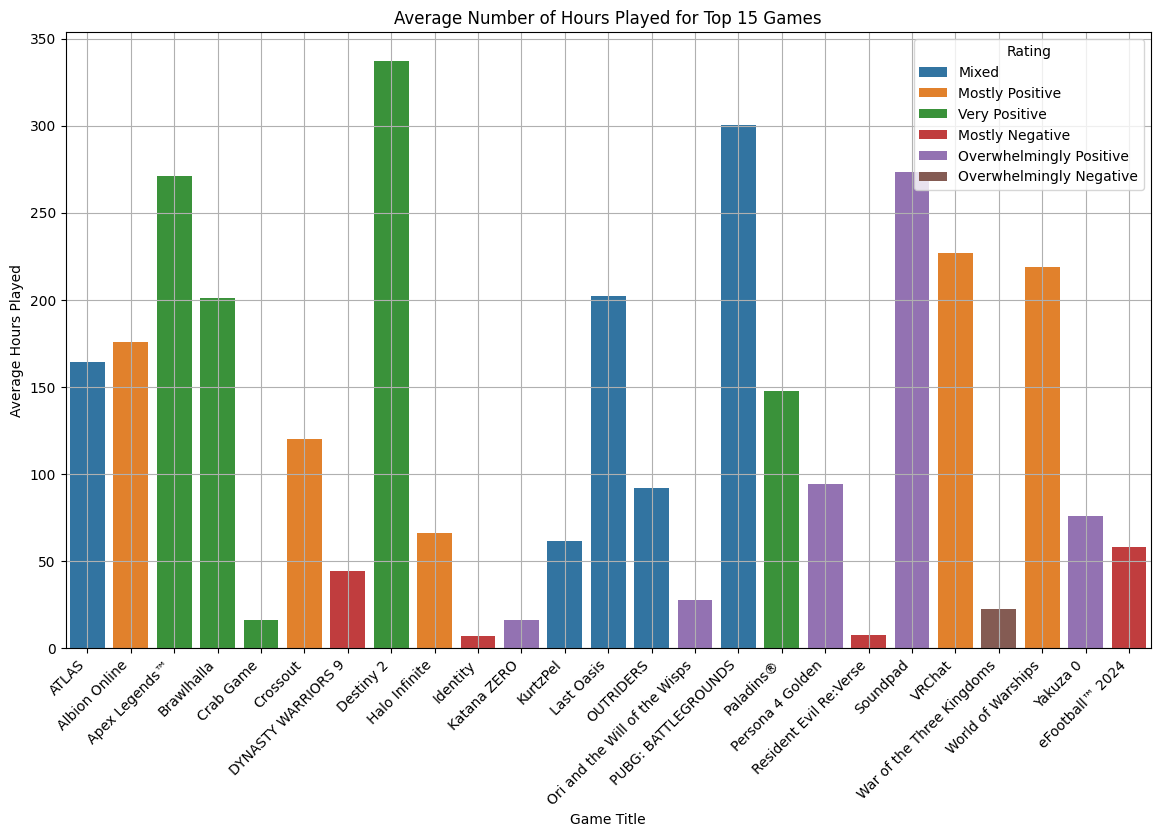

In [21]:
#Eexploratory data analysis 2-- Average number of hours played for each game

# Filter needed columns and ratings
df = Final[['GameTitle', 'HoursPlayed', 'Rating', 'ReviewID']]

# Group by title and rating and count the number of reviews
top_games = df.groupby(['GameTitle', 'Rating']).size().reset_index(name='review_count')

# For each rating get top 5 games based on number of reviews
top_games = top_games.groupby('Rating').apply(lambda x: x.nlargest(5, 'review_count')).reset_index(drop=True)

# Filter original dataframe with top games
filtered_df = Final[Final['GameTitle'].isin(top_games['GameTitle'])]

# Calculate the average number of hours played for each game
avg_hours = filtered_df.groupby(['GameTitle', 'Rating'])['HoursPlayed'].mean().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='GameTitle', y='HoursPlayed', hue='Rating', data=avg_hours, dodge=False)
plt.title('Average Number of Hours Played for Top 15 Games')
plt.xlabel('Game Title')
plt.ylabel('Average Hours Played')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2007703469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2007703469.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


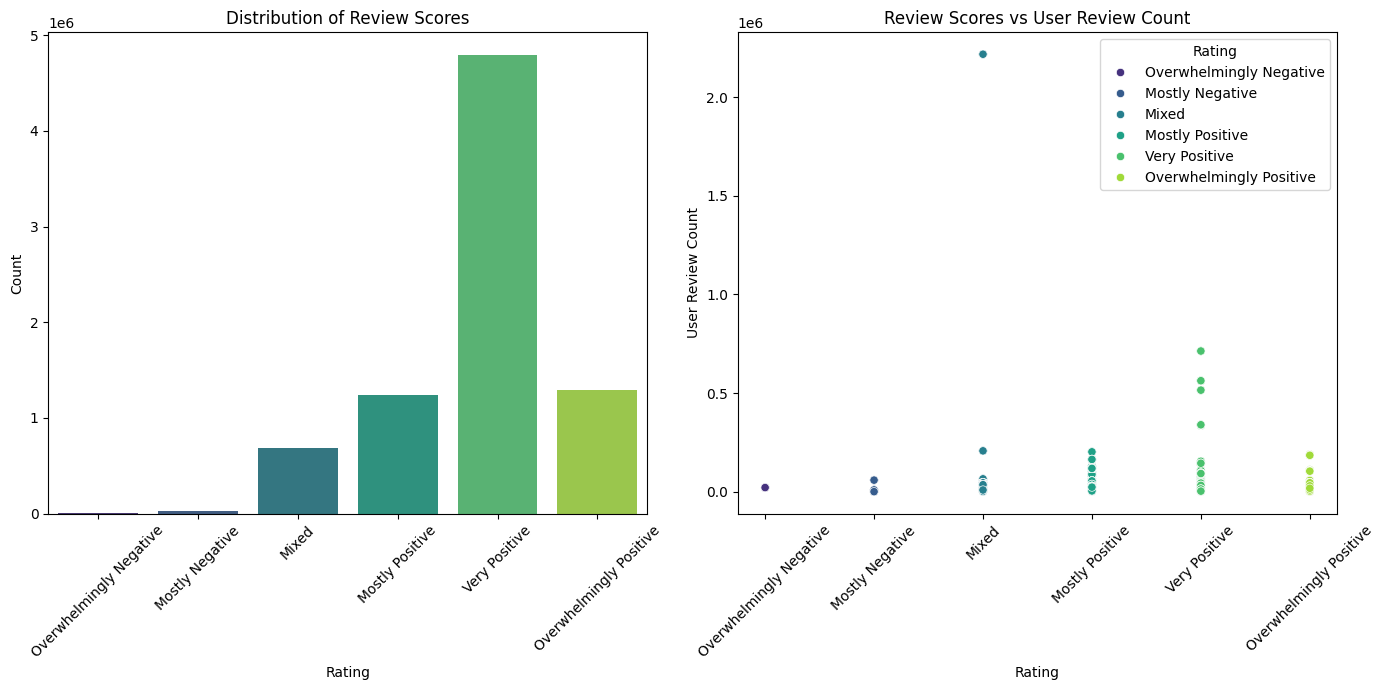

In [22]:
#AIM 1
# Convert necessary columns to appropriate formats
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'])

# Convert rating to categorical type for proper ordering in plots
rating_order = ['Overwhelmingly Negative', 'Mostly Negative', 'Mixed', 'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive']
Final['Rating'] = pd.Categorical(Final['Rating'], categories=rating_order, ordered=True)

# Create subplots for better presentation
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: Distribution of Review Scores 
rating_counts = Final['Rating'].value_counts().reindex(rating_order)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Review Scores')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Review Scores vs User Review Count 
sns.scatterplot(x='Rating', y='UserReviewCount', data=Final, hue='Rating', palette='viridis', ax=axes[1])
axes[1].set_title('Review Scores vs User Review Count')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('User Review Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2959750483.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hours_per_rating = Final.groupby('Rating')['HoursPlayed'].mean().reindex(rating_order).reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2959750483.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='HoursPlayed', data=avg_hours_per_rating, palette='viridis', ax=axes[1])


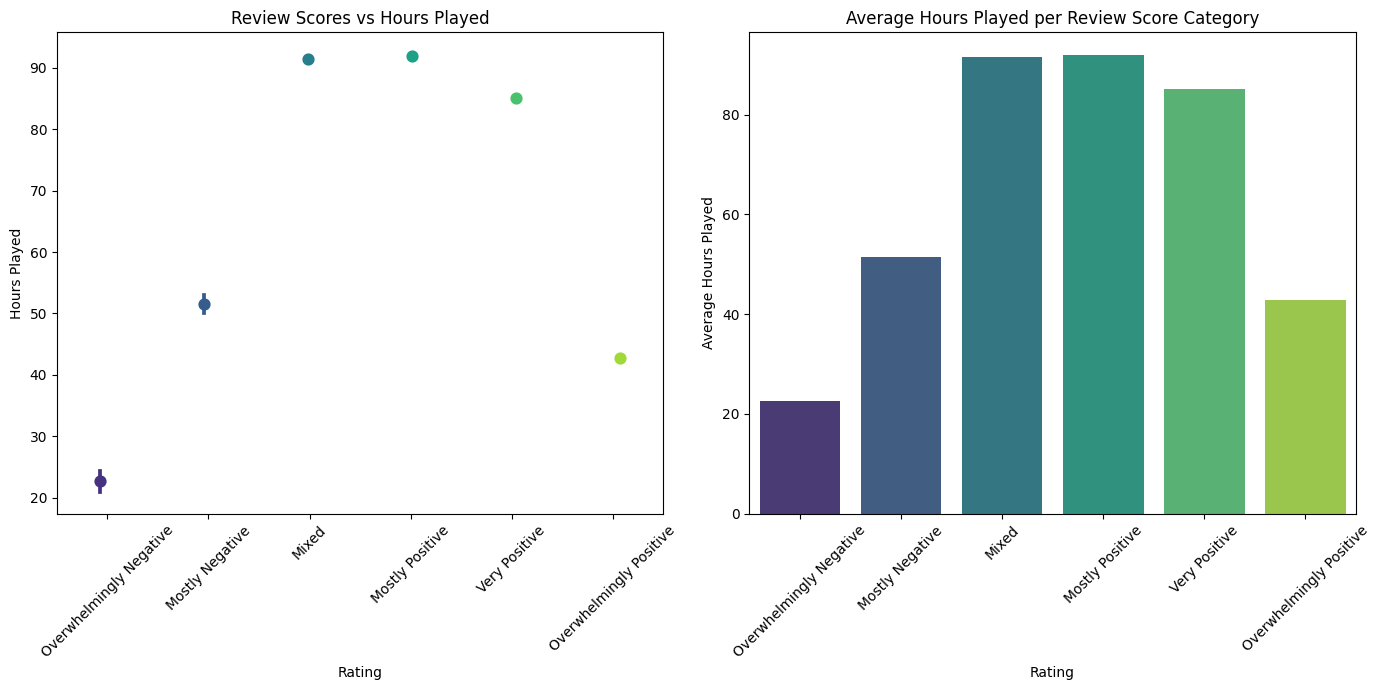

In [23]:
# Objective 2: Patterns in review scores and how they relate to metrics like game sales and player engagement

#Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: Review Scores vs Hours Played 
sns.pointplot(x='Rating', y='HoursPlayed', data=Final, hue='Rating', palette='viridis', ax=axes[0], dodge=True, markers='o', linestyles='')
axes[0].set_title('Review Scores vs Hours Played')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Hours Played')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Average Hours Played for Each Review Score Category 
avg_hours_per_rating = Final.groupby('Rating')['HoursPlayed'].mean().reindex(rating_order).reset_index()
sns.barplot(x='Rating', y='HoursPlayed', data=avg_hours_per_rating, palette='viridis', ax=axes[1])
axes[1].set_title('Average Hours Played per Review Score Category')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average Hours Played')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2115970097.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_hours = Final.groupby(['Year', 'Rating'])['HoursPlayed'].mean().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2115970097.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


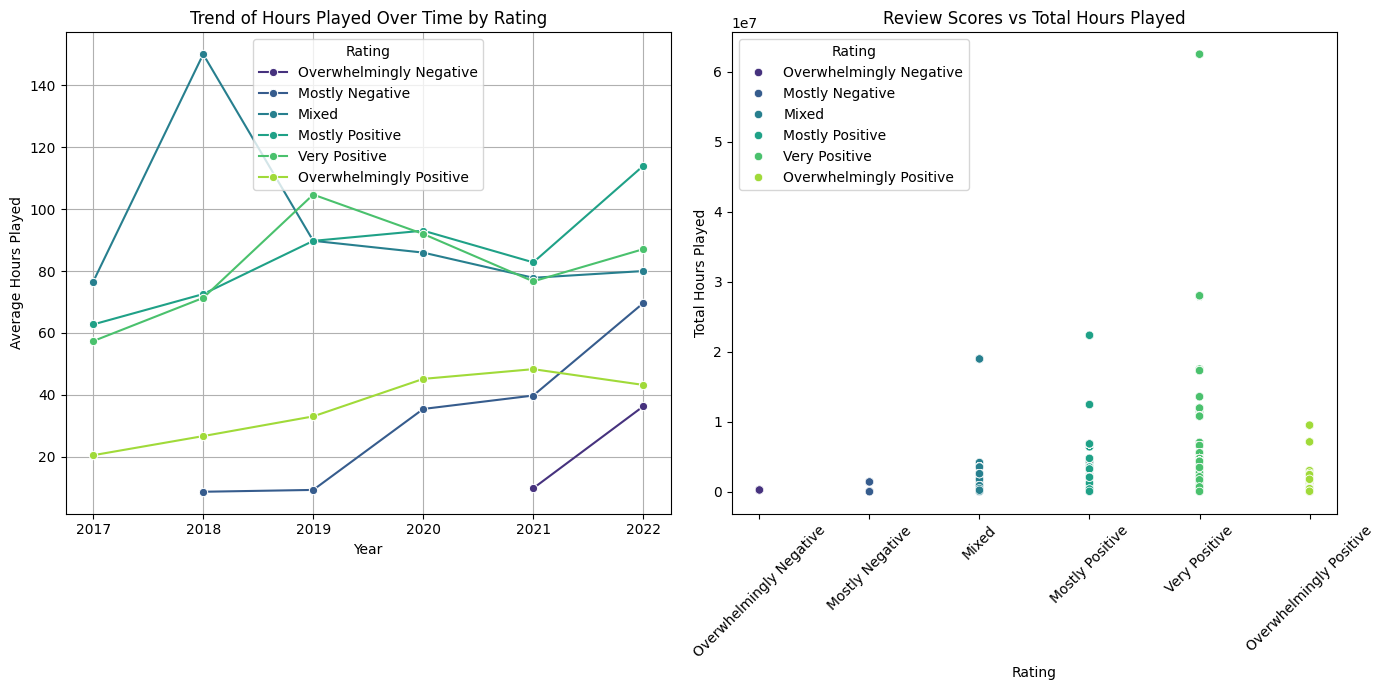

In [24]:
# Objective 3: How various review scores affect both short- and long-term game success

# Extract year from ReviewDate
Final['Year'] = Final['ReviewDate'].dt.year

# Create subplots for better presentation
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: Trend of Hours Played Over Time for Different Review Scores 
yearly_hours = Final.groupby(['Year', 'Rating'])['HoursPlayed'].mean().reset_index()
sns.lineplot(x='Year', y='HoursPlayed', hue='Rating', data=yearly_hours, marker='o', palette='viridis', ax=axes[0])
axes[0].set_title('Trend of Hours Played Over Time by Rating')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Hours Played')
axes[0].grid(True)

# Plot 2: Review Scores vs Total Hours Played 
Final['TotalHoursPlayed'] = Final.groupby('GameTitle')['HoursPlayed'].transform('sum')
sns.scatterplot(x='Rating', y='TotalHoursPlayed', data=Final, hue='Rating', palette='viridis', ax=axes[1])
axes[1].set_title('Review Scores vs Total Hours Played')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Total Hours Played')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2123398702.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='ReleaseMonth', y='UserReviewCount', data=monthly_reviews, palette='viridis')


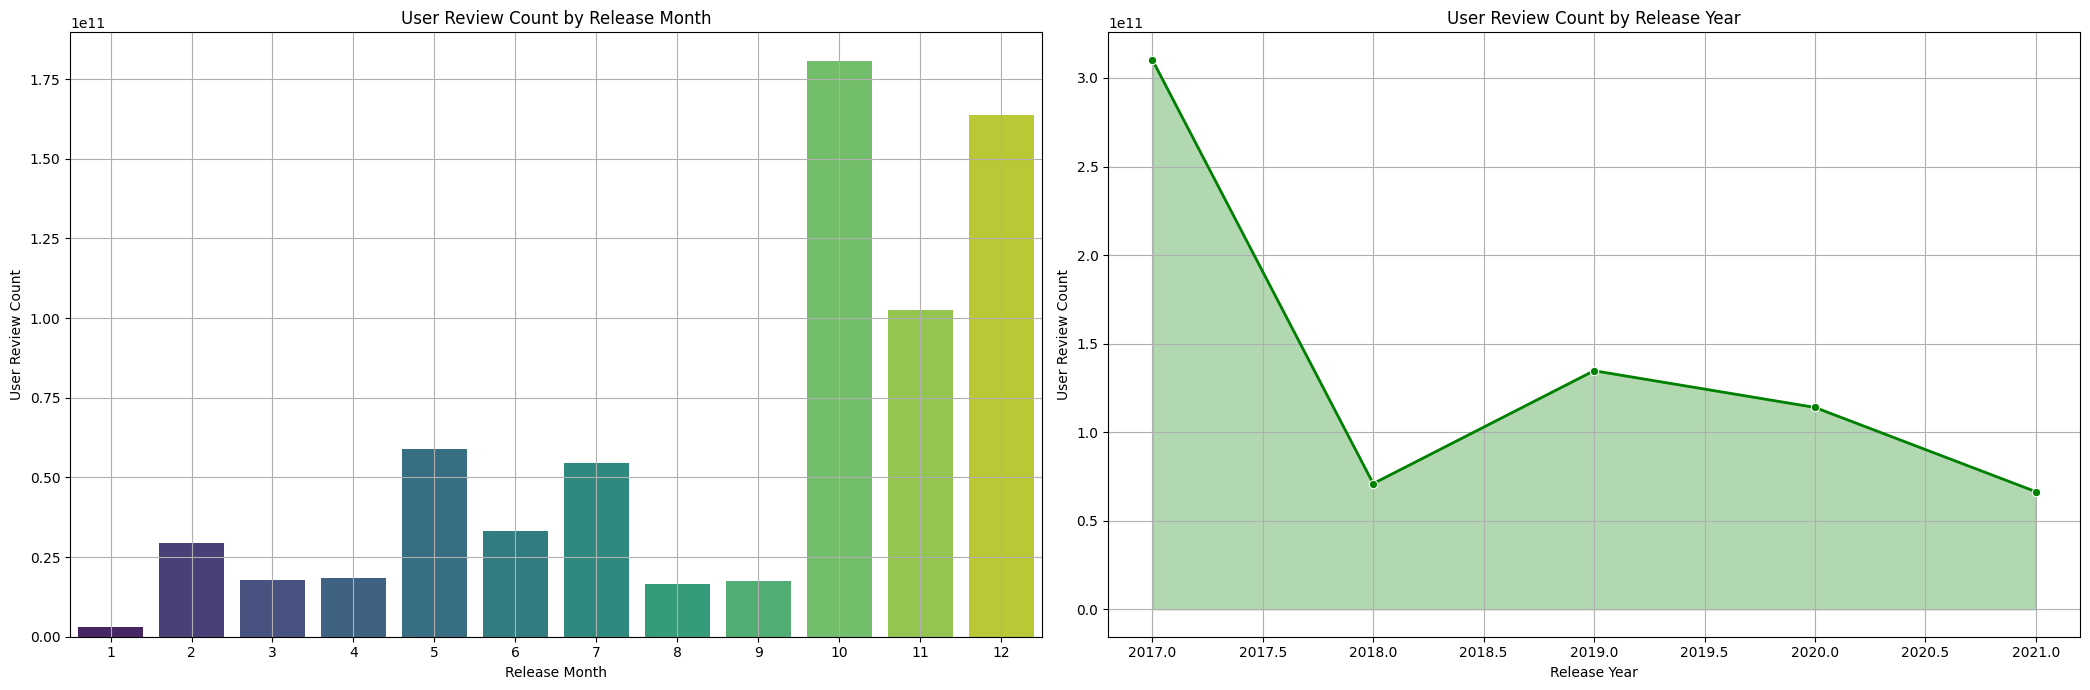

In [39]:
#Aim 2
# 1: To examine the impact of launching at various times on sales performance, taking into account significant sales events and seasonal trends.


# Convert necessary columns to appropriate formats
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'])

# Extract month and year from ReleaseDate
Final['ReleaseMonth'] = Final['ReleaseDate'].dt.month
Final['ReleaseYear'] = Final['ReleaseDate'].dt.year

# Aggregate user review counts by release month and year
monthly_reviews = Final.groupby('ReleaseMonth')['UserReviewCount'].sum().reset_index()
yearly_reviews = Final.groupby('ReleaseYear')['UserReviewCount'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# Plot 1: Analyze user review count by release month 
sns.barplot(ax=axes[0], x='ReleaseMonth', y='UserReviewCount', data=monthly_reviews, palette='viridis')
axes[0].set_title('User Review Count by Release Month')
axes[0].set_xlabel('Release Month')
axes[0].set_ylabel('User Review Count')
axes[0].grid(True)

# Plot 2: Analyze user review count by release year 
sns.lineplot(ax=axes[1], x='ReleaseYear', y='UserReviewCount', data=yearly_reviews, marker='o', color='g', linewidth=2)
axes[1].fill_between(yearly_reviews['ReleaseYear'], yearly_reviews['UserReviewCount'], color='green', alpha=0.3)
axes[1].set_title('User Review Count by Release Year')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('User Review Count')
axes[1].grid(True)


plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\3886834562.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='ReleaseMonth', y='HoursPlayed', data=Final, palette='viridis')


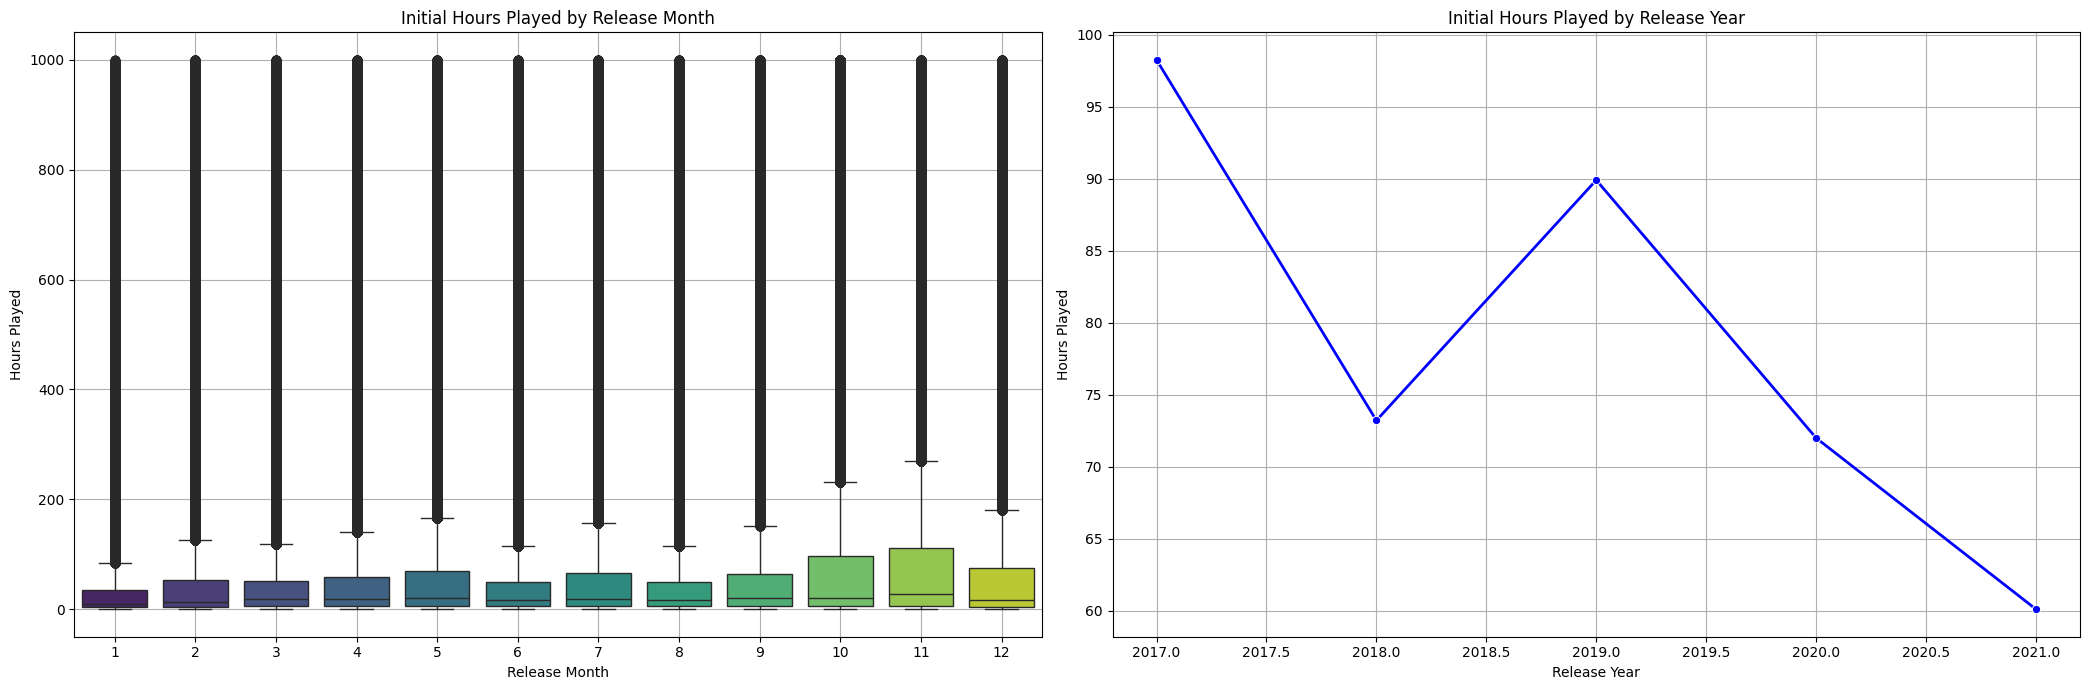

In [26]:
#Objective 2

# To ascertain the release schedule’s strategic effects on the game’s initial reception.
#For this objective, we will analyze the initial user engagement (hours played) based on the release month and year.

# Create subplots for better presentation
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# Plot 1: Initial Hours Played by Release Month
sns.boxplot(ax=axes[0], x='ReleaseMonth', y='HoursPlayed', data=Final, palette='viridis')
axes[0].set_title('Initial Hours Played by Release Month')
axes[0].set_xlabel('Release Month')
axes[0].set_ylabel('Hours Played')
axes[0].grid(True)

# Plot 2: Initial Hours Played by Release Year 
yearly_hours = Final.groupby('ReleaseYear')['HoursPlayed'].mean().reset_index()
sns.lineplot(ax=axes[1], x='ReleaseYear', y='HoursPlayed', data=yearly_hours, marker='o', color='b', linewidth=2)
axes[1].set_title('Initial Hours Played by Release Year')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Hours Played')
axes[1].grid(True)


plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1432621410.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='ReleaseMonth', y='TotalHoursPlayed', data=monthly_hours, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1432621410.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='ReleaseYear', y='TotalHoursPlayed', data=yearly_hours, palette='viridis')


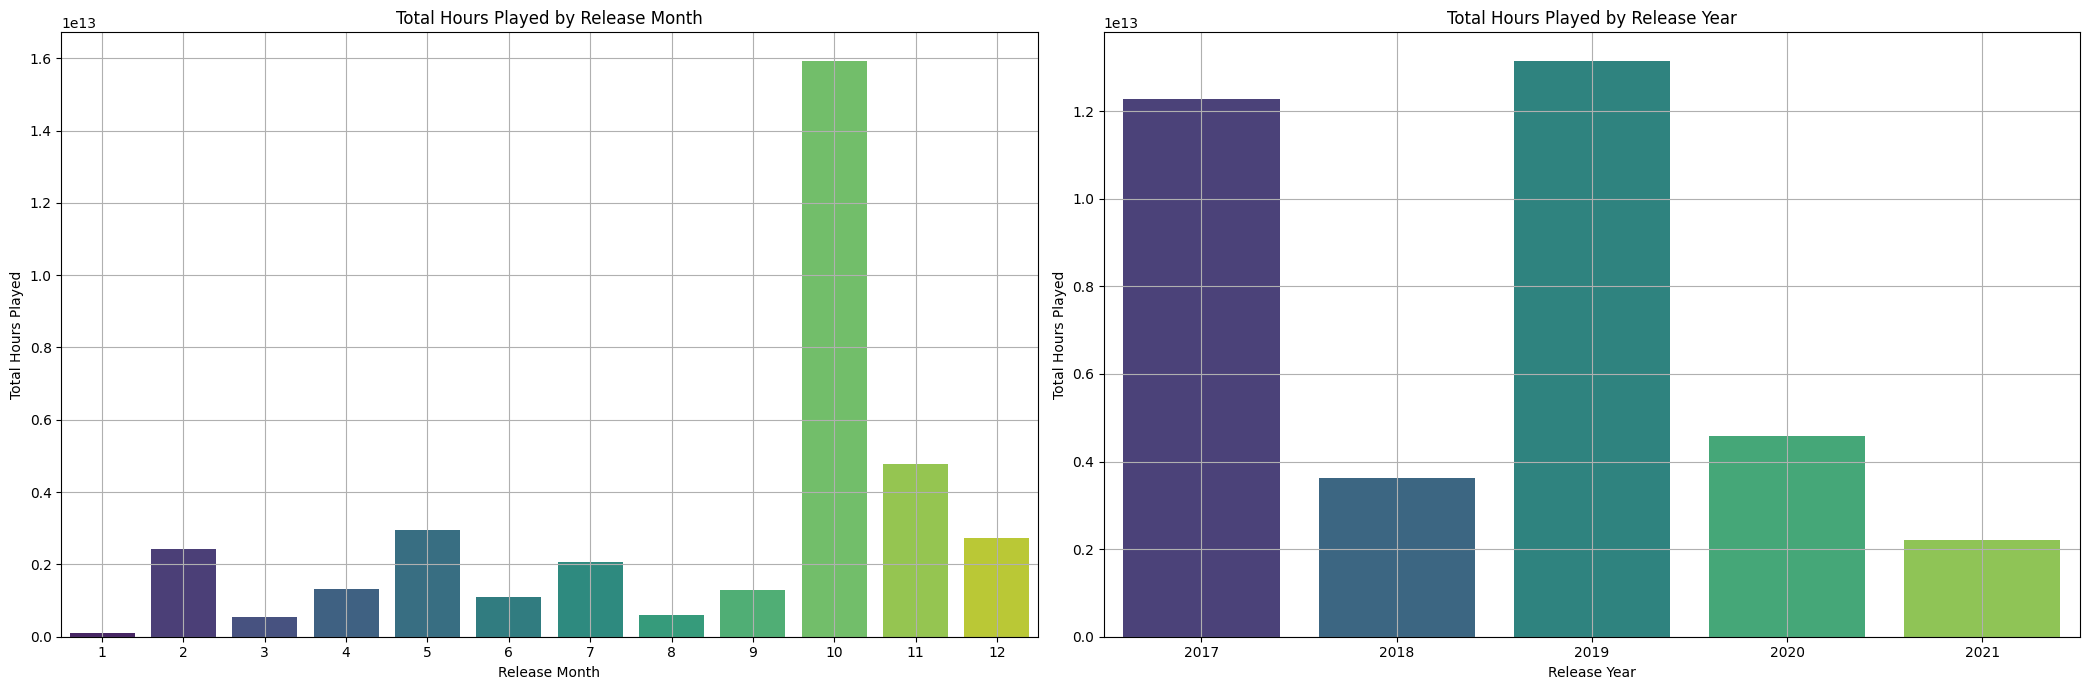

In [27]:
#Objective 3: 
# Calculate total hours played for each game
Final['TotalHoursPlayed'] = Final.groupby('GameTitle')['HoursPlayed'].transform('sum')

# Aggregate total hours played by release month and year
monthly_hours = Final.groupby('ReleaseMonth')['TotalHoursPlayed'].sum().reset_index()
yearly_hours = Final.groupby('ReleaseYear')['TotalHoursPlayed'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# Plot 1: Total Hours Played by Release Month (Bar Plot)
sns.barplot(ax=axes[0], x='ReleaseMonth', y='TotalHoursPlayed', data=monthly_hours, palette='viridis')
axes[0].set_title('Total Hours Played by Release Month')
axes[0].set_xlabel('Release Month')
axes[0].set_ylabel('Total Hours Played')
axes[0].grid(True)

# Plot 2: Total Hours Played by Release Year (Bar Plot)
sns.barplot(ax=axes[1], x='ReleaseYear', y='TotalHoursPlayed', data=yearly_hours, palette='viridis')
axes[1].set_title('Total Hours Played by Release Year')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Total Hours Played')
axes[1].grid(True)


plt.tight_layout()
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1951743436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='PricingModel', y='UserReviewCount', data=Final, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1951743436.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='PricingModel', y='HoursPlayed', data=Final, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1951743436.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='PricingModel', y='FinalPrice', data=Fin

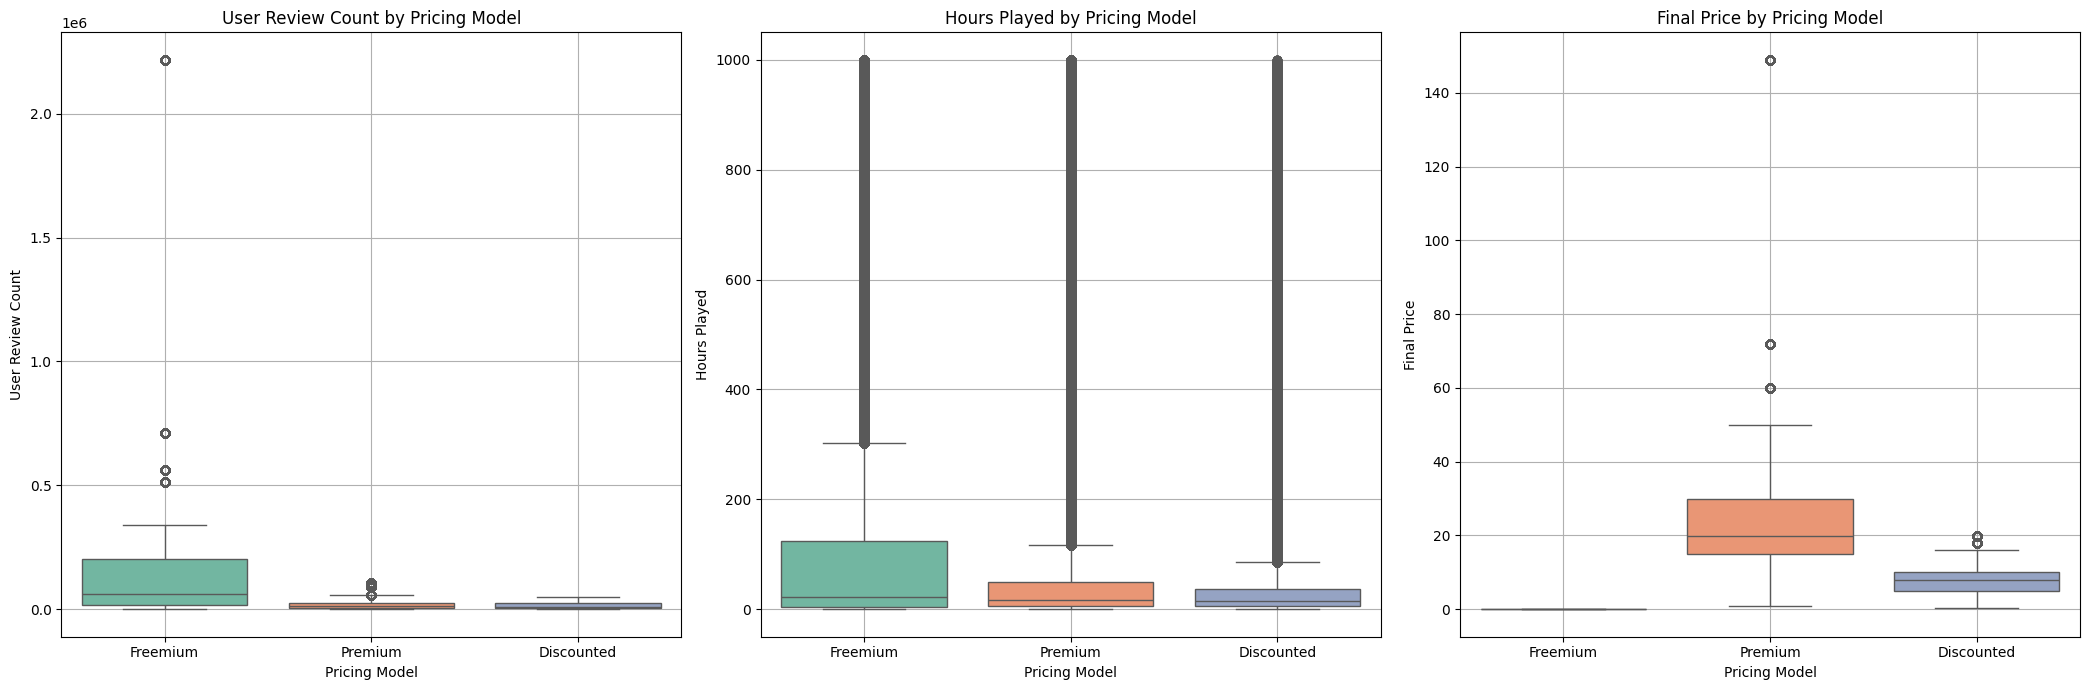

In [28]:
#AIM 3

# Convert necessary columns to appropriate formats
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'])

# Define pricing model categories
Final['PricingModel'] = 'Premium'
Final.loc[Final['is_free'] == True, 'PricingModel'] = 'Freemium'
Final.loc[Final['DiscountPercentage'] > 0, 'PricingModel'] = 'Discounted'

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# User Review Count by Pricing Model
sns.boxplot(ax=axes[0], x='PricingModel', y='UserReviewCount', data=Final, palette='Set2')
axes[0].set_title('User Review Count by Pricing Model')
axes[0].set_xlabel('Pricing Model')
axes[0].set_ylabel('User Review Count')
axes[0].grid(True)

# Hours Played by Pricing Model
sns.boxplot(ax=axes[1], x='PricingModel', y='HoursPlayed', data=Final, palette='Set2')
axes[1].set_title('Hours Played by Pricing Model')
axes[1].set_xlabel('Pricing Model')
axes[1].set_ylabel('Hours Played')
axes[1].grid(True)

# Final Price by Pricing Model
sns.boxplot(ax=axes[2], x='PricingModel', y='FinalPrice', data=Final, palette='Set2')
axes[2].set_title('Final Price by Pricing Model')
axes[2].set_xlabel('Pricing Model')
axes[2].set_ylabel('Final Price')
axes[2].grid(True)


plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1729084480.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='PricingModel', y='PositiveRatio', data=Final, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1729084480.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


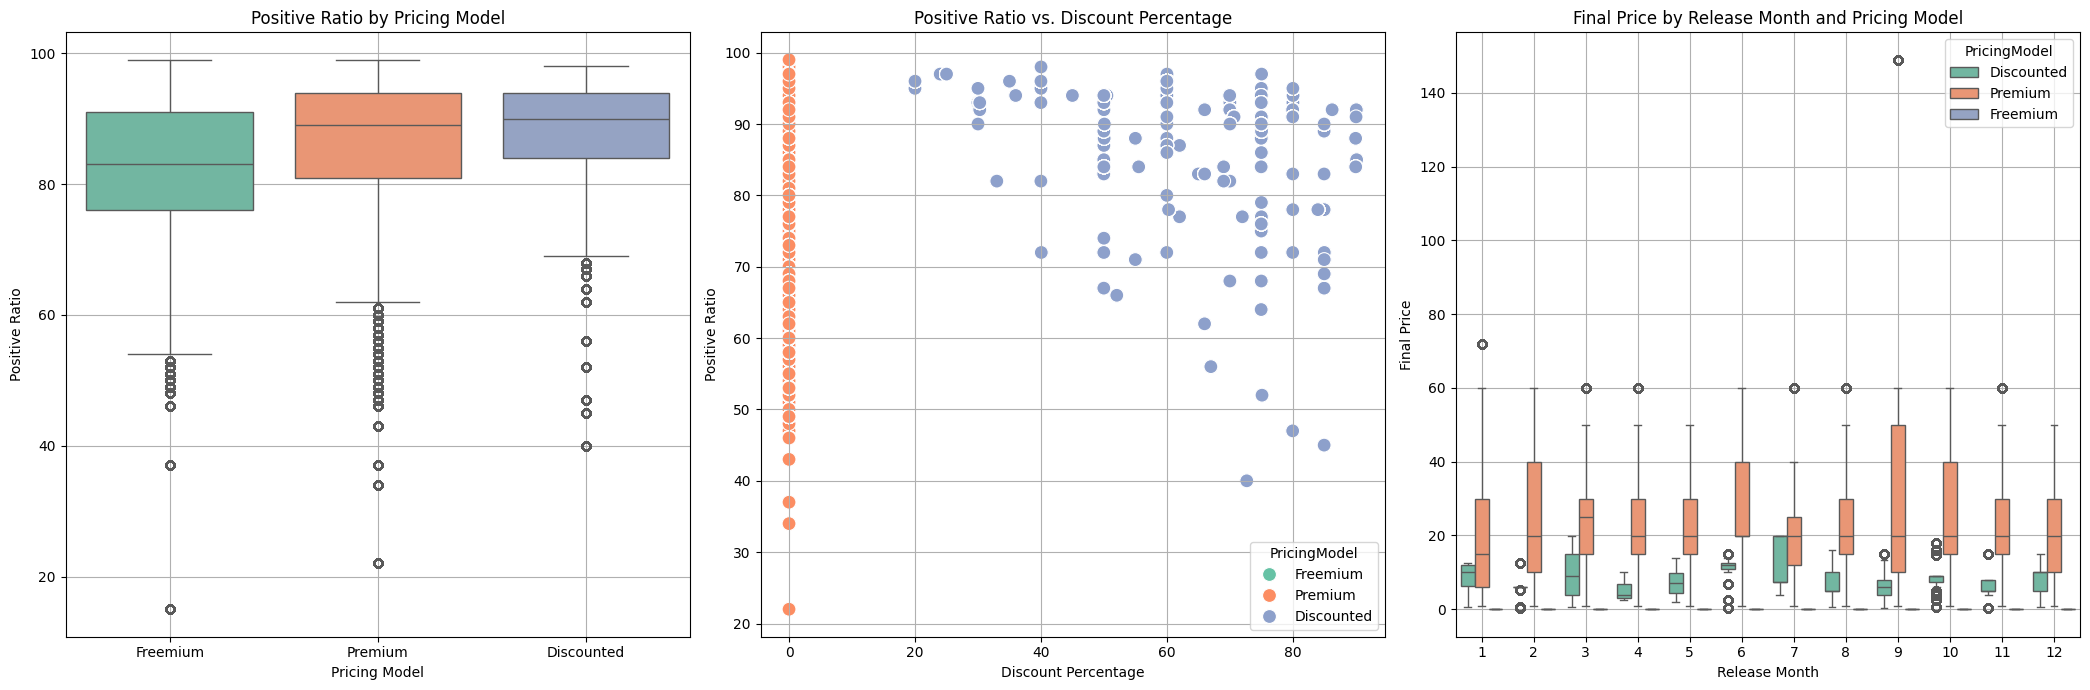

In [29]:
#Objective 2


# Extract the release month
Final['ReleaseMonth'] = Final['ReleaseDate'].dt.month

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# User feedback by Pricing Model
sns.boxplot(ax=axes[0], x='PricingModel', y='PositiveRatio', data=Final, palette='Set2')
axes[0].set_title('Positive Ratio by Pricing Model')
axes[0].set_xlabel('Pricing Model')
axes[0].set_ylabel('Positive Ratio')
axes[0].grid(True)

# Impact of Discount Percentage on Positive Ratio
sns.scatterplot(ax=axes[1], x='DiscountPercentage', y='PositiveRatio', hue='PricingModel', data=Final, palette='Set2', s=100)
axes[1].set_title('Positive Ratio vs. Discount Percentage')
axes[1].set_xlabel('Discount Percentage')
axes[1].set_ylabel('Positive Ratio')
axes[1].grid(True)

# Income generation over different release months
sns.boxplot(ax=axes[2], x='ReleaseMonth', y='FinalPrice', hue='PricingModel', data=Final, palette='Set2')
axes[2].set_title('Final Price by Release Month and Pricing Model')
axes[2].set_xlabel('Release Month')
axes[2].set_ylabel('Final Price')
axes[2].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1601999616.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


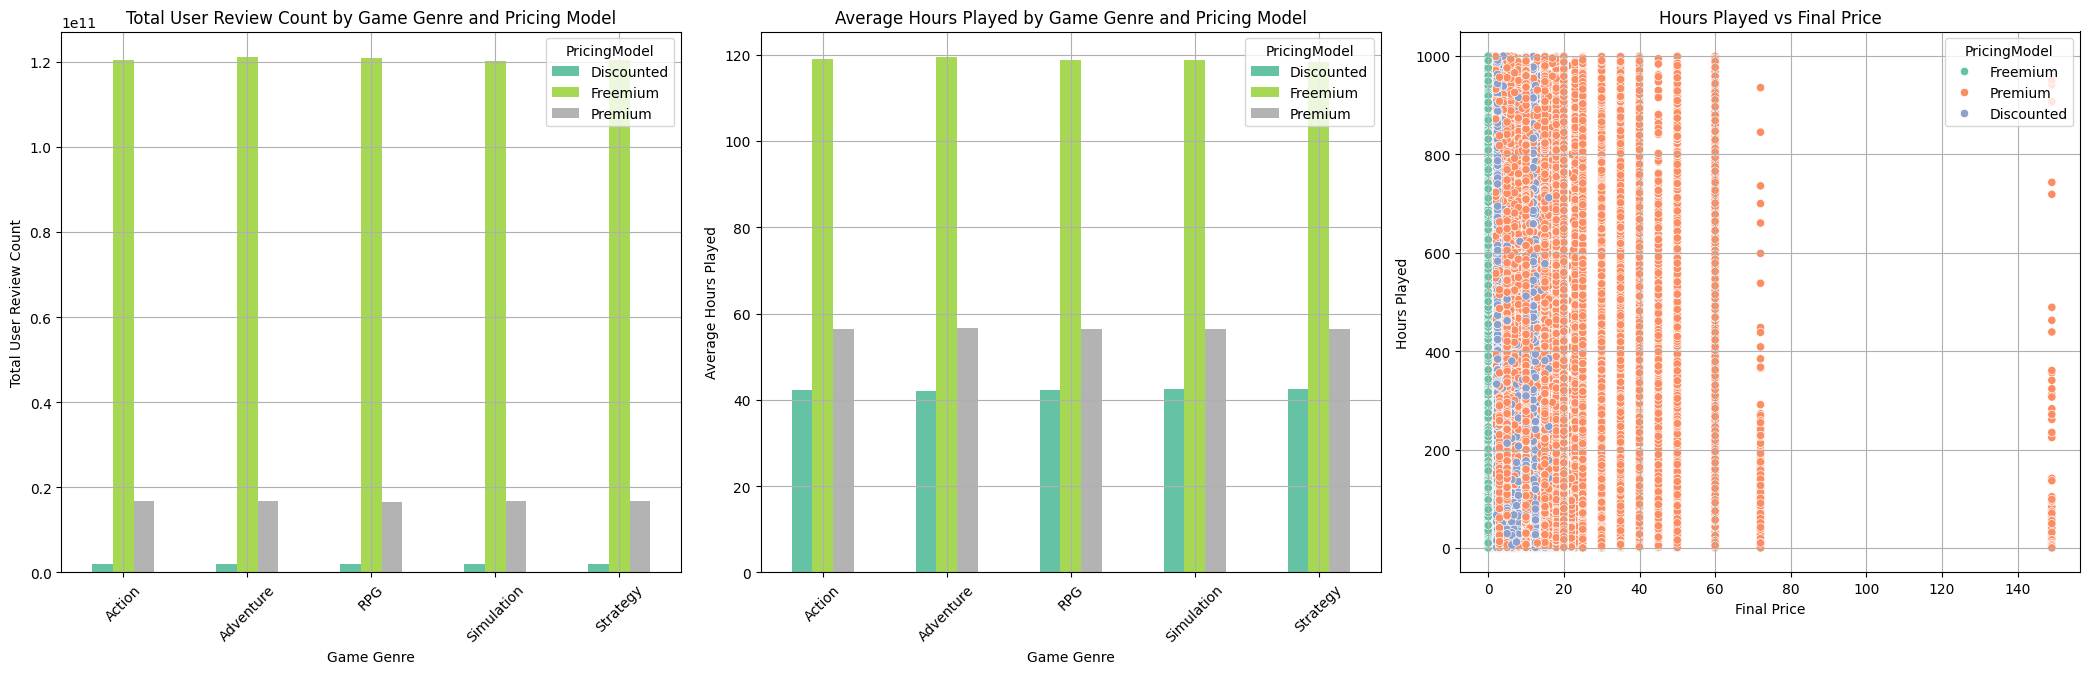

In [30]:
#Objective 3

# Example code to add a hypothetical GameGenre column for demonstration
genres = ['Action', 'Adventure', 'RPG', 'Simulation', 'Strategy']
Final['GameGenre'] = [random.choice(genres) for _ in range(len(Final))]

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Plot 1: Total User Review Count by Game Genre and Pricing Model 
review_count = Final.groupby(['GameGenre', 'PricingModel'])['UserReviewCount'].sum().unstack()
review_count.plot(kind='bar', ax=axes[0], colormap='Set2')
axes[0].set_title('Total User Review Count by Game Genre and Pricing Model')
axes[0].set_xlabel('Game Genre')
axes[0].set_ylabel('Total User Review Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot 2: Average Hours Played by Game Genre and Pricing Model 
avg_hours = Final.groupby(['GameGenre', 'PricingModel'])['HoursPlayed'].mean().unstack()
avg_hours.plot(kind='bar', ax=axes[1], colormap='Set2')
axes[1].set_title('Average Hours Played by Game Genre and Pricing Model')
axes[1].set_xlabel('Game Genre')
axes[1].set_ylabel('Average Hours Played')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Plot 3: Hours Played vs Final Price (Scatter Plot)
sns.scatterplot(ax=axes[2], x='FinalPrice', y='HoursPlayed', hue='PricingModel', data=Final, palette='Set2')
axes[2].set_title('Hours Played vs Final Price')
axes[2].set_xlabel('Final Price')
axes[2].set_ylabel('Hours Played')
axes[2].grid(True)

plt.tight_layout()
plt.show()


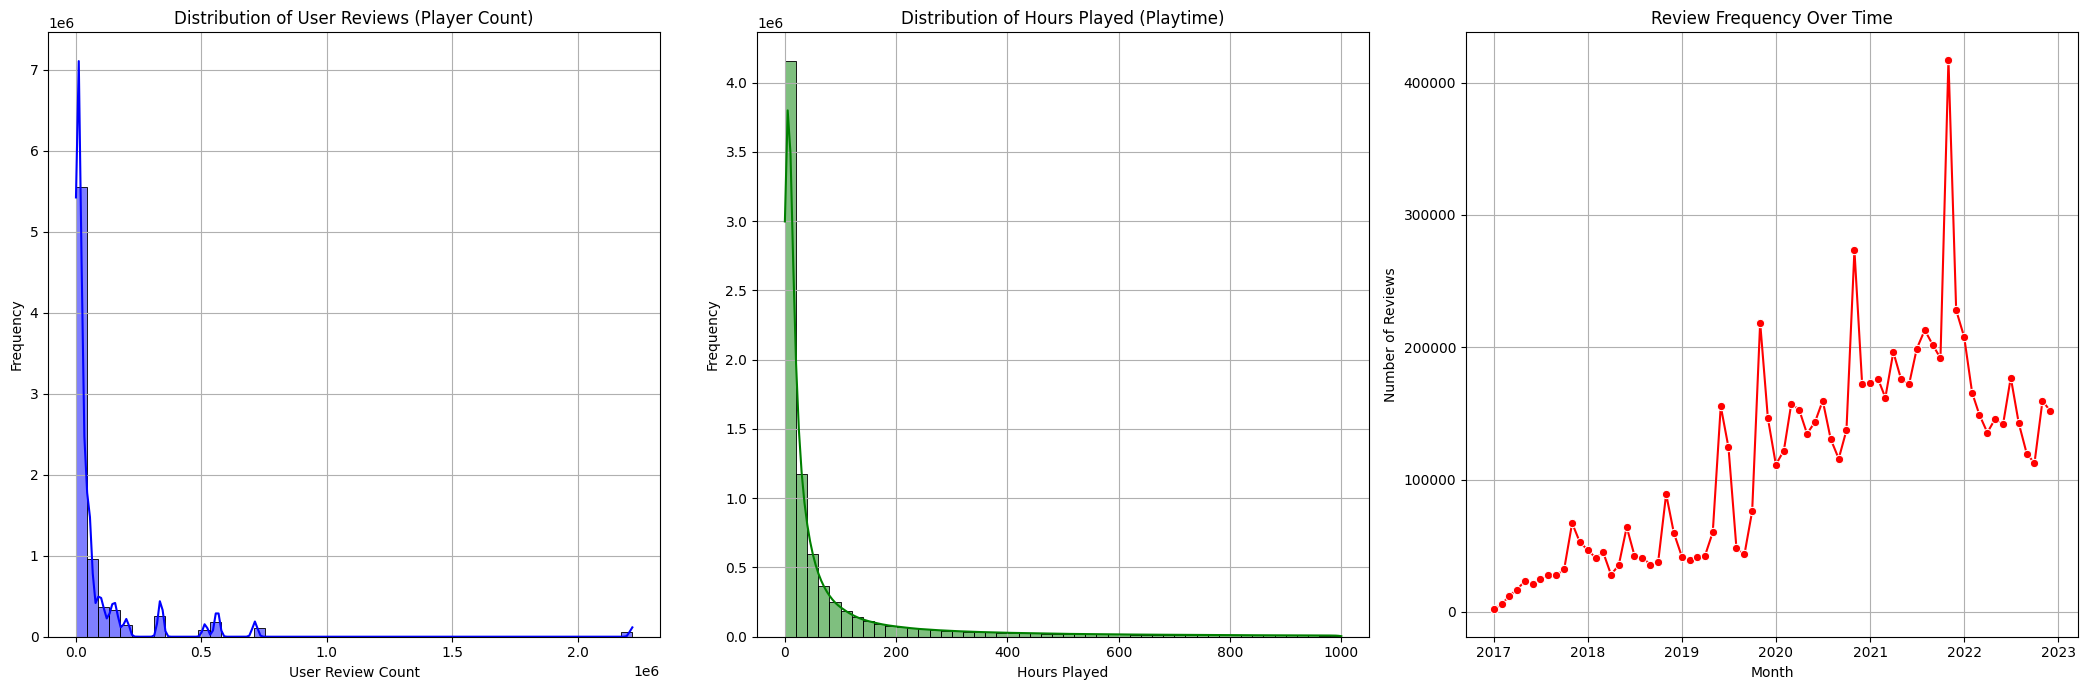

In [31]:
#Aim 4

# Convert necessary columns to appropriate formats
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'])

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Distribution of user reviews (proxy for player count)
sns.histplot(Final['UserReviewCount'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of User Reviews (Player Count)')
axes[0].set_xlabel('User Review Count')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Distribution of hours played (playtime)
sns.histplot(Final['HoursPlayed'], bins=50, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Hours Played (Playtime)')
axes[1].set_xlabel('Hours Played')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Calculating and plotting review frequency (number of reviews per month)
Final['ReviewMonth'] = Final['ReviewDate'].dt.to_period('M').astype(str)
review_frequency = Final.groupby('ReviewMonth')['ReviewID'].count().reset_index()
review_frequency['ReviewMonth'] = pd.to_datetime(review_frequency['ReviewMonth'])

sns.lineplot(x='ReviewMonth', y='ReviewID', data=review_frequency, marker='o', color='red', ax=axes[2])
axes[2].set_title('Review Frequency Over Time')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Reviews')
axes[2].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\890635203.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='UserReviewCount', data=Final, palette='Set3', ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\890635203.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='HoursPlayed', data=Final, palette='Set3', ax=axes[1])


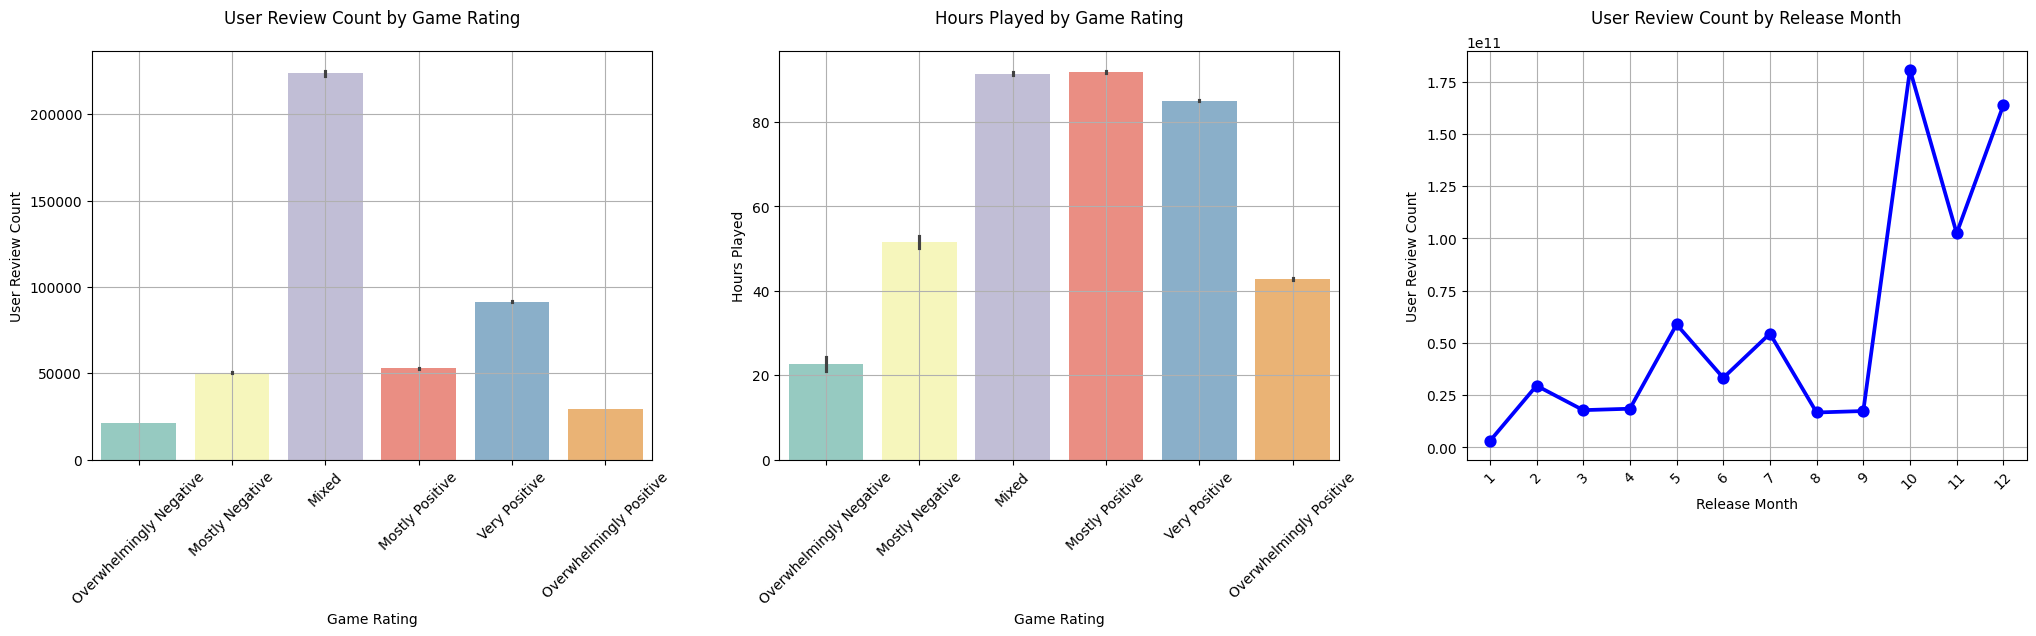

In [32]:
#Objective 2


# Extract month from ReleaseDate
Final['ReleaseMonth'] = Final['ReleaseDate'].dt.month

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# User review count by game rating (Bar Plot)
sns.barplot(x='Rating', y='UserReviewCount', data=Final, palette='Set3', ax=axes[0])
axes[0].set_title('User Review Count by Game Rating', pad=20)  # Added pad for space
axes[0].set_xlabel('Game Rating')
axes[0].set_ylabel('User Review Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels 45 degrees
axes[0].grid(True)

# Hours played by game rating (Bar Plot)
sns.barplot(x='Rating', y='HoursPlayed', data=Final, palette='Set3', ax=axes[1])
axes[1].set_title('Hours Played by Game Rating', pad=20)  # Added pad for space
axes[1].set_xlabel('Game Rating')
axes[1].set_ylabel('Hours Played')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels 45 degrees
axes[1].grid(True)

# User review count by release month (Point Plot)
monthly_reviews = Final.groupby('ReleaseMonth')['UserReviewCount'].sum().reset_index()
sns.pointplot(x='ReleaseMonth', y='UserReviewCount', data=monthly_reviews, color='b', ax=axes[2], markers='o')
axes[2].set_title('User Review Count by Release Month', pad=20)  # Added pad for space
axes[2].set_xlabel('Release Month')
axes[2].set_ylabel('User Review Count')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels 45 degrees
axes[2].grid(True)

# Adjust the layout to add more spacing between plots and titles
plt.tight_layout(pad=3.0)
plt.show()


In [33]:
#Objective 3- Explanations

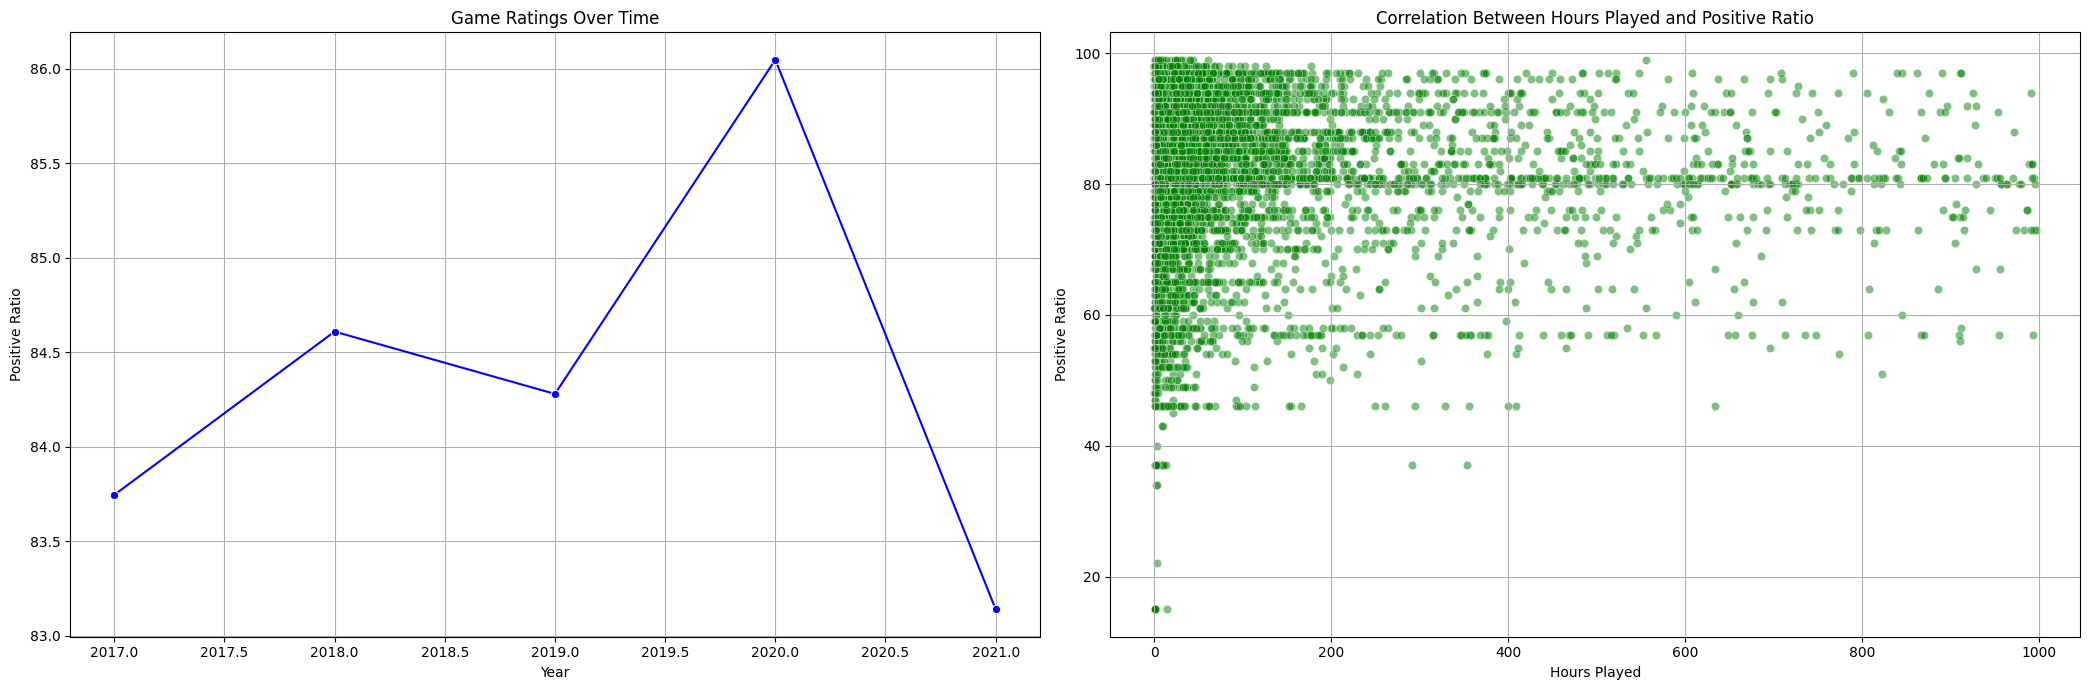

In [34]:
#AIM 5

# Sample the data
sample_size = 10000  
if len(Final) > sample_size:
    Final_sample = Final.sample(sample_size, random_state=42)
else:
    Final_sample = Final

# Convert 'ReleaseDate' to datetime format
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'], errors='coerce')

# Extract year from ReleaseDate
Final['Year'] = Final['ReleaseDate'].dt.year

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# Plot 1: Visualize Game Ratings Over Time 
average_ratings = Final.groupby('Year')['PositiveRatio'].mean().reset_index()
sns.lineplot(x='Year', y='PositiveRatio', data=average_ratings, marker='o', ax=axes[0], color='blue')
axes[0].set_title('Game Ratings Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Positive Ratio')
axes[0].grid(True)

# Plot 2: Faster Correlation Between Hours Played and Positive Ratio 
sns.scatterplot(x='HoursPlayed', y='PositiveRatio', data=Final_sample, ax=axes[1], alpha=0.5, color='green')
axes[1].set_title('Correlation Between Hours Played and Positive Ratio')
axes[1].set_xlabel('Hours Played')
axes[1].set_ylabel('Positive Ratio')
axes[1].grid(True)


plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2401131345.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlatformSupport', y='UserReviewCount', data=platform_support_counts, palette='Set3', ax=axes[1])


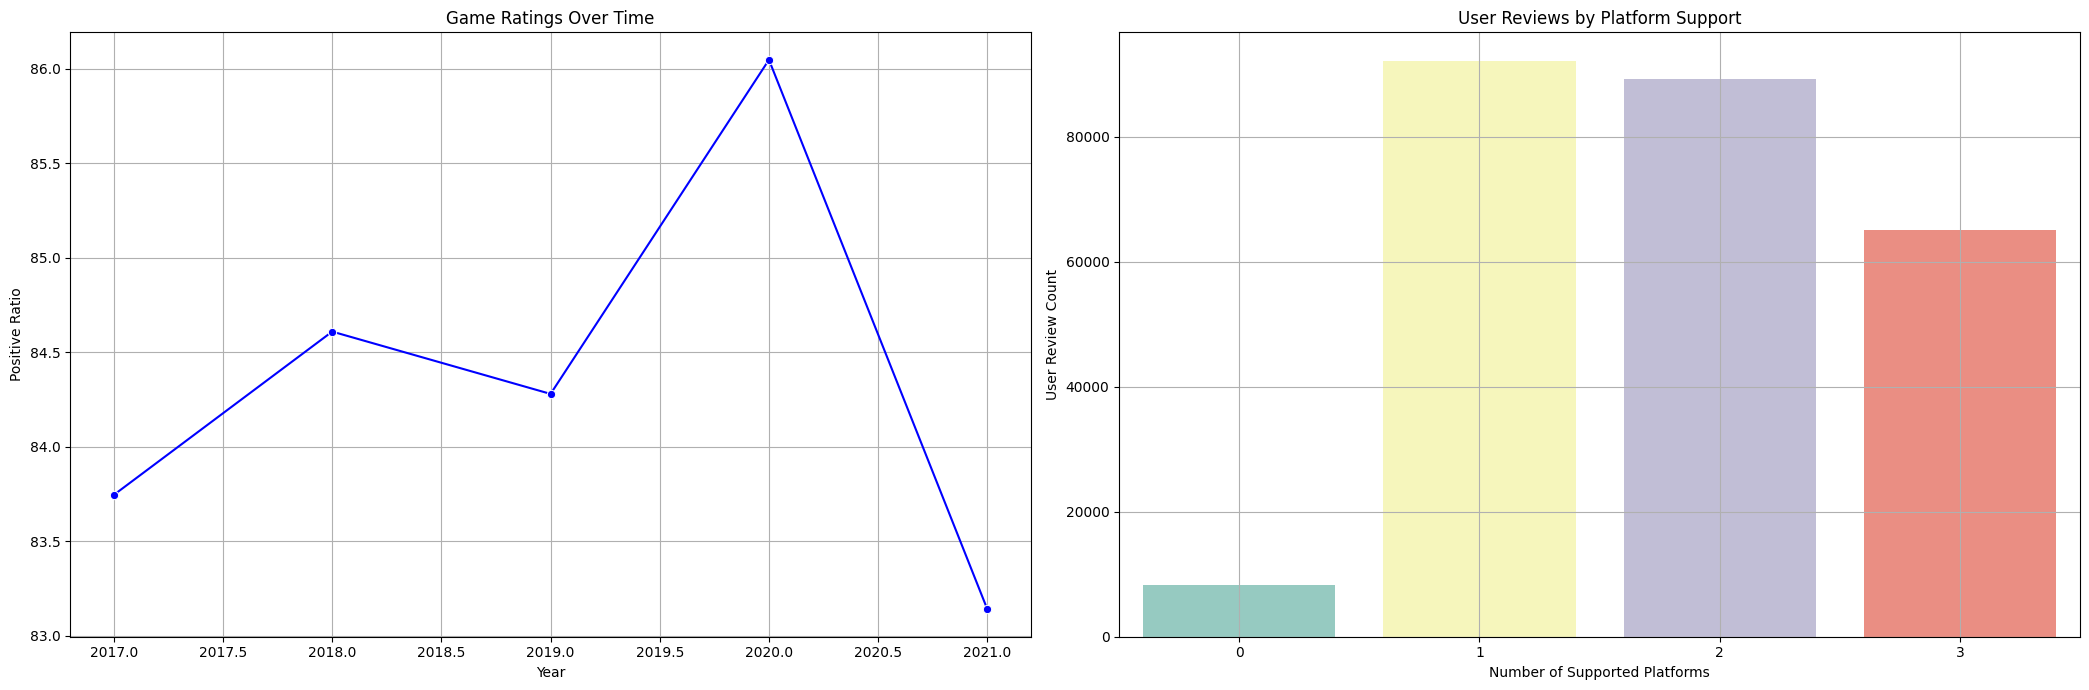

In [35]:
#Objective 2:

# Convert necessary columns to appropriate formats
Final['ReviewDate'] = pd.to_datetime(Final['ReviewDate'])
Final['ReleaseDate'] = pd.to_datetime(Final['ReleaseDate'])

# Extract year from ReleaseDate
Final['Year'] = Final['ReleaseDate'].dt.year

# Define platform support category
Final['PlatformSupport'] = Final[['WindowsSupport', 'MacSupport', 'LinuxSupport']].sum(axis=1)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# Plot 1: Visualize Game Ratings Over Time 
average_ratings = Final.groupby('Year')['PositiveRatio'].mean().reset_index()
sns.lineplot(x='Year', y='PositiveRatio', data=average_ratings, marker='o', ax=axes[0], color='blue')
axes[0].set_title('Game Ratings Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Positive Ratio')
axes[0].grid(True)

# Plot 2: Impact of Multi-Platform Support on User Reviews 
platform_support_counts = Final.groupby('PlatformSupport')['UserReviewCount'].mean().reset_index()
sns.barplot(x='PlatformSupport', y='UserReviewCount', data=platform_support_counts, palette='Set3', ax=axes[1])
axes[1].set_title('User Reviews by Platform Support')
axes[1].set_xlabel('Number of Supported Platforms')
axes[1].set_ylabel('User Review Count')
axes[1].grid(True)


plt.tight_layout()
plt.show()






C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\3023310975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate']).apply(lambda x: x.timestamp())
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\3023310975.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ReviewDate'] = pd.to_datetime(X['ReviewDate']).apply(lambda x: x.timestamp())


Accuracy: 0.7077643706774221
              precision    recall  f1-score   support

           0       0.71      0.70      0.71    806169
           1       0.70      0.71      0.71    802680

    accuracy                           0.71   1608849
   macro avg       0.71      0.71      0.71   1608849
weighted avg       0.71      0.71      0.71   1608849



C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\3023310975.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


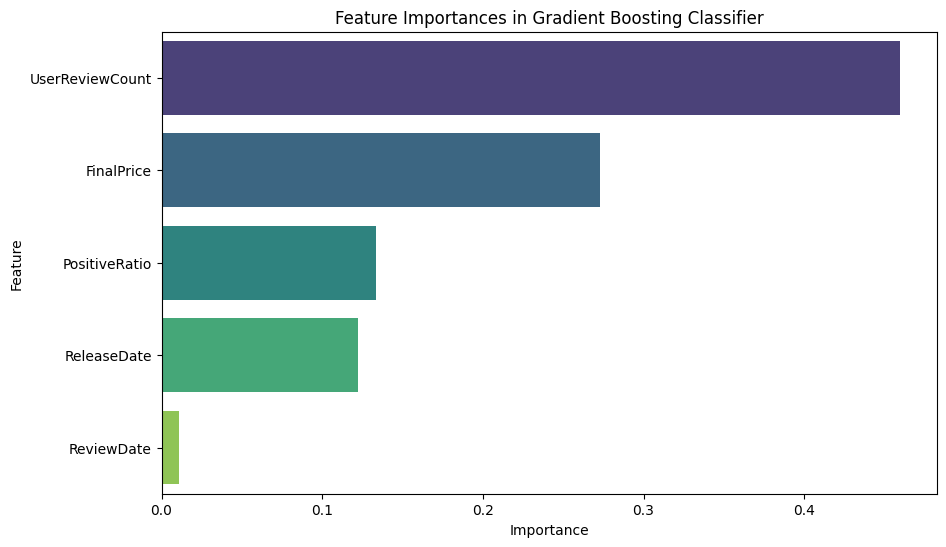

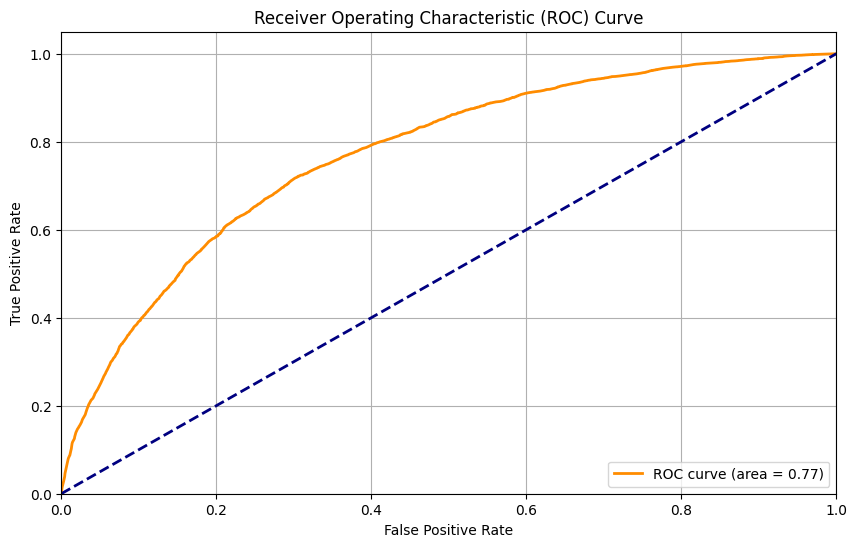

In [36]:
#GGradient booster, model 1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Prepare the data
features = ['PositiveRatio', 'FinalPrice', 'UserReviewCount', 'ReleaseDate', 'ReviewDate']
X = Final[features]  # Features
y = (Final['HoursPlayed'] > Final['HoursPlayed'].median()).astype(int)  # Target (binary classification: high vs. low hours played)

# Convert string date features to datetime and then to numerical values (e.g., timestamps)
X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate']).apply(lambda x: x.timestamp())
X['ReviewDate'] = pd.to_datetime(X['ReviewDate']).apply(lambda x: x.timestamp())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ROC Curve Plot
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2698737380.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate']).apply(lambda x: x.timestamp())
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2698737380.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ReviewDate'] = pd.to_datetime(X['ReviewDate']).apply(lambda x: x.timestamp())


Accuracy: 0.6279557862241145
              precision    recall  f1-score   support

           0       0.60      0.74      0.67    241742
           1       0.67      0.51      0.58    240913

    accuracy                           0.63    482655
   macro avg       0.63      0.63      0.62    482655
weighted avg       0.63      0.63      0.62    482655



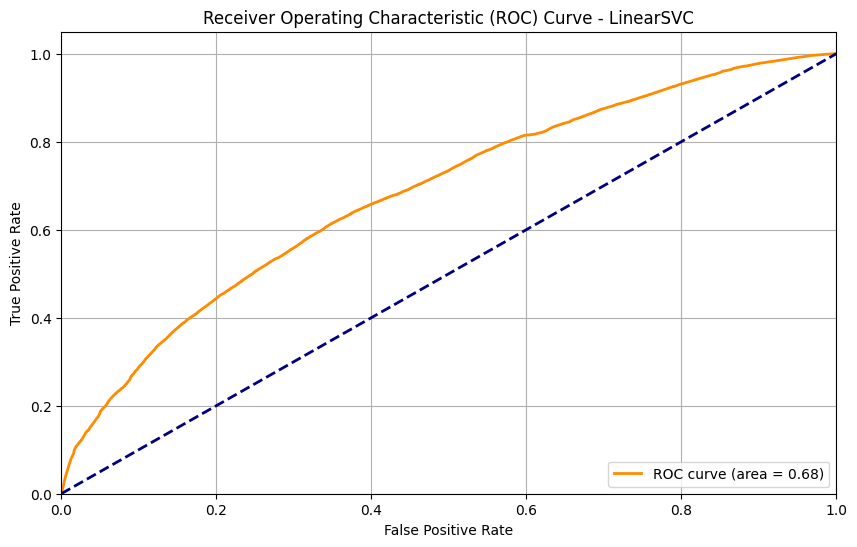

In [37]:
#SVC MODEL

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Prepare the data
features = ['PositiveRatio', 'FinalPrice', 'UserReviewCount', 'ReleaseDate', 'ReviewDate']  # Example feature columns
X = Final[features]  # Replace with actual feature columns
y = (Final['HoursPlayed'] > Final['HoursPlayed'].median()).astype(int)  # Example binary target

# Convert date features to numerical values (if applicable)
X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate']).apply(lambda x: x.timestamp())
X['ReviewDate'] = pd.to_datetime(X['ReviewDate']).apply(lambda x: x.timestamp())

# Optionally, subsample the data to reduce execution time
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.3, random_state=42)  # 30% of the data for faster testing

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LinearSVC for faster training with a smaller C for less complexity
svc_model = LinearSVC(random_state=42, C=0.1, max_iter=5000)  # Reduce C for faster computation
svc_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svc = svc_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_svc)}')
print(classification_report(y_test, y_pred_svc))

# LinearSVC does not have predict_proba, so we simulate ROC curve based on decision function
y_decision_svc = svc_model.decision_function(X_test_scaled)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_decision_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LinearSVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2020146963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate']).apply(lambda x: x.timestamp())
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\2020146963.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ReviewDate'] = pd.to_datetime(X['ReviewDate']).apply(lambda x: x.timestamp())


Accuracy: 0.7377319203157535
              precision    recall  f1-score   support

           0       0.74      0.73      0.73    241742
           1       0.73      0.75      0.74    240913

    accuracy                           0.74    482655
   macro avg       0.74      0.74      0.74    482655
weighted avg       0.74      0.74      0.74    482655



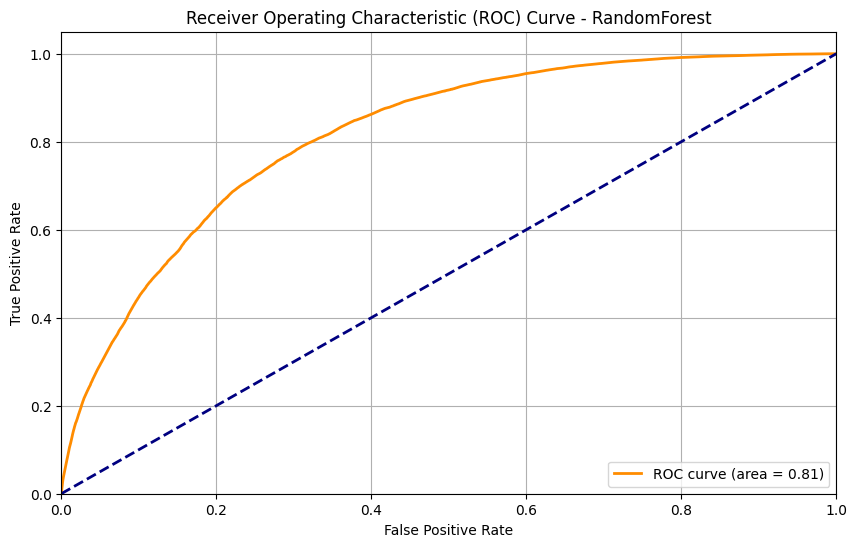

In [38]:
#RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Prepare the data
features = ['PositiveRatio', 'FinalPrice', 'UserReviewCount', 'ReleaseDate', 'ReviewDate']  # Example feature columns
X = Final[features]  # Replace with actual feature columns
y = (Final['HoursPlayed'] > Final['HoursPlayed'].median()).astype(int)  # Example binary target

# Convert date features to numerical values (if applicable)
X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate']).apply(lambda x: x.timestamp())
X['ReviewDate'] = pd.to_datetime(X['ReviewDate']).apply(lambda x: x.timestamp())

# Optionally, subsample the data to reduce execution time
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.3, random_state=42)  # 30% of the data for faster testing

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train RandomForestClassifier for faster execution
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees (reduce if the dataset is too large)
    max_depth=10,      # Limit tree depth to control complexity
    random_state=42,
    n_jobs=-1          # Use all available processors to speed up the computation
)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))

# Get the predicted probabilities for ROC curve
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RandomForest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
